# 服装分类

### 导入所需依赖

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf

### 引入数据

In [2]:
train_data = pd.read_csv('train__data.csv')
test_data = pd.read_csv('test_data.csv')

train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 数据规模

In [3]:
print('训练数据大小（行，列） : {}'.format(train_data.shape))
print('测试数据大小（行，列） : {}'.format(test_data.shape))

训练数据大小（行，列） : (60000, 785)
测试数据大小（行，列） : (10000, 785)


In [4]:
train_data = np.array(train_data, dtype= 'float32')
test_data = np.array(test_data, dtype= 'float32')

### 处理像素化的数据，使其成为可视的图片

In [5]:
X_train_orig = train_data[:, 1:]/ 255
y_train_orig = train_data[:, 0]

X_test = test_data[:, 1:]/ 255
Y_test = test_data[:, 0]

### 创建训练集和验证集

In [6]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train_orig, y_train_orig, test_size = 0.2, random_state=42)

# 随机展示数据

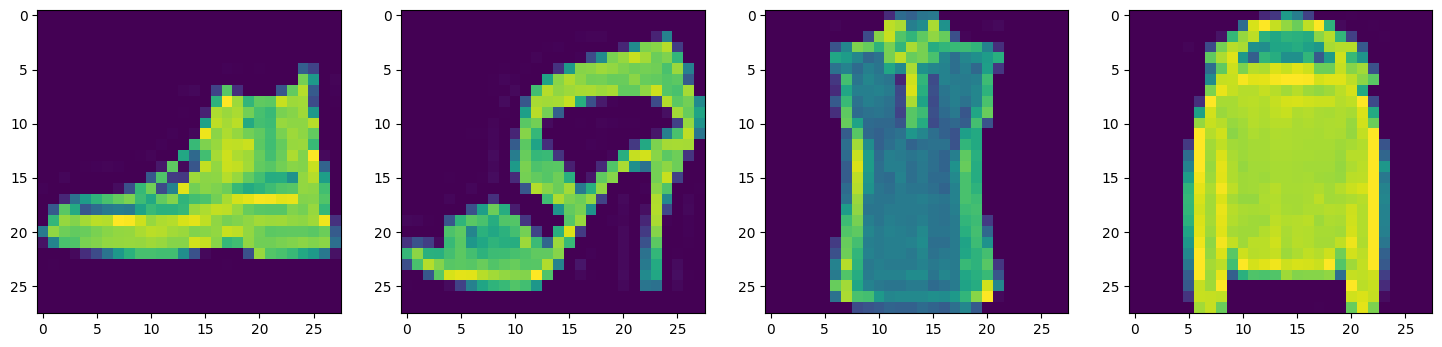

In [7]:
# Lets check some images
plt.figure(figsize = (18,6))

plt.subplot(141)
image = X_train[49].reshape(28, 28)
plt.imshow(image)

plt.subplot(142)
image = X_train[3].reshape(28, 28)
plt.imshow(image)

plt.subplot(143)
image = X_train[6].reshape(28, 28)
plt.imshow(image)

plt.subplot(144)
image = X_train[8].reshape(28, 28)
plt.imshow(image)
plt.show()

# 神经网络，两层全连接层，分别有128个和512个神经元，20个输出神经元

In [8]:
from tensorflow.python.keras.layers import Dense
n_cols = X_train.shape[1]
model = tf.keras.models.Sequential()

model.add(Dense(512, activation='relu', input_shape=(n_cols,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 输出模型各层的参数状况

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr = 0.0001),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# 使用tf.keras.models.Sequential()中的fit()函数训练模型

In [11]:
model_1 = model.fit(X_train, y_train,
                    batch_size=300,
                    epochs = 20,
                    verbose=1,
                    validation_data=(X_validate, y_validate))

Epoch 1/20
160/160 [==============================] - 1s 3ms/step - loss: 0.9444 - accuracy: 0.7183 - val_loss: 0.5828 - val_accuracy: 0.8079
Epoch 2/20
160/160 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.8280 - val_loss: 0.4923 - val_accuracy: 0.8292
Epoch 3/20
160/160 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.8431 - val_loss: 0.4533 - val_accuracy: 0.8408
Epoch 4/20
160/160 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.8551 - val_loss: 0.4212 - val_accuracy: 0.8543
Epoch 5/20
160/160 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8605 - val_loss: 0.4087 - val_accuracy: 0.8587
Epoch 6/20
160/160 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.8662 - val_loss: 0.3907 - val_accuracy: 0.8652
Epoch 7/20
160/160 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.8713 - val_loss: 0.3839 - val_accuracy: 0.8659
Epoch 

In [12]:
model.save('saved_model/model.h5')

In [8]:
from tensorflow.keras.models import load_model
model=load_model('saved_model/model.h5')

In [9]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.3163886070251465
Test accuracy: 88.55000138282776


### 图像重塑以及重新编码

In [10]:
image_rows = 28
image_cols = 28
input_shape = (image_rows, image_cols, 1)

X_train = X_train.reshape(X_train.shape[0], image_rows, image_cols, 1)
X_test = X_test.reshape(X_test.shape[0], image_rows, image_cols, 1)
X_validate = X_validate.reshape(X_validate.shape[0], image_rows, image_cols, 1)

# 使用to_categorical()函数分别将y_train、y_validate、y_test几个验证集按照10个类别表示

In [11]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_validate = to_categorical(y_validate, 10)
y_test = to_categorical(Y_test, 10)

# 一层卷积层，一个2x2池层，一个有128个神经元完全连接层的神经网络

In [16]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Flatten
cnn_model = tf.keras.models.Sequential()

cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten()) 

cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.3))

cnn_model.add(Dense(10, activation='softmax'))

 * __model.compile():__ 方法用于在配置训练方法时，告知训练时用的优化器、损失函数和准确率评测标准
 其中optimizer为优化器，此处采用adam优化器；
 * __loss__ 为损失函数，此处采用categorical_crossentropy函数，相当于 tf.keras.losses.SparseCatagoricalCrossentropy(from_logits = False)，from_logits代表是否将输出转为概率分布的形式，为False时表示转换为概率分布
 * __Metrics__ 为标注网络评价指标即准确率， 此处采用"accuracy" ， y_ 和 y 都是数值，y_为真实值，y为预测值

In [17]:
cnn_model.compile(optimizer= Adam(lr= 0.0001),
          loss='categorical_crossentropy',
          metrics=['accuracy'])

# 输出神经网络卷积层的参数情况

In [18]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

# 使用fit()函数训练模型

In [19]:
history = cnn_model.fit(X_train, y_train,
          batch_size=300,
          epochs=50,
          verbose=1,
          validation_data=(X_validate, y_validate))

Epoch 1/50
160/160 [==============================] - 16s 4ms/step - loss: 1.1703 - accuracy: 0.6349 - val_loss: 0.6621 - val_accuracy: 0.7844
Epoch 2/50
160/160 [==============================] - 0s 3ms/step - loss: 0.6486 - accuracy: 0.7776 - val_loss: 0.5288 - val_accuracy: 0.8178
Epoch 3/50
160/160 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.8094 - val_loss: 0.4722 - val_accuracy: 0.8350
Epoch 4/50
160/160 [==============================] - 0s 3ms/step - loss: 0.5004 - accuracy: 0.8265 - val_loss: 0.4378 - val_accuracy: 0.8470
Epoch 5/50
160/160 [==============================] - 0s 3ms/step - loss: 0.4682 - accuracy: 0.8367 - val_loss: 0.4143 - val_accuracy: 0.8561
Epoch 6/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.8444 - val_loss: 0.3975 - val_accuracy: 0.8622
Epoch 7/50
160/160 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8518 - val_loss: 0.3815 - val_accuracy: 0.8662
Epoch

In [12]:
from tensorflow.keras.models import load_model
cnn_model=load_model('saved_model/cnn_Model1.h5')

In [13]:
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.22947758436203003
Test accuracy: 91.68000221252441


#### 储存模型

In [21]:
from tensorflow.keras.models import load_model
cnn_model.save('saved_model/cnn_Model1.h5')

model123=load_model('saved_model/cnn_Model1.h5')
model123.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

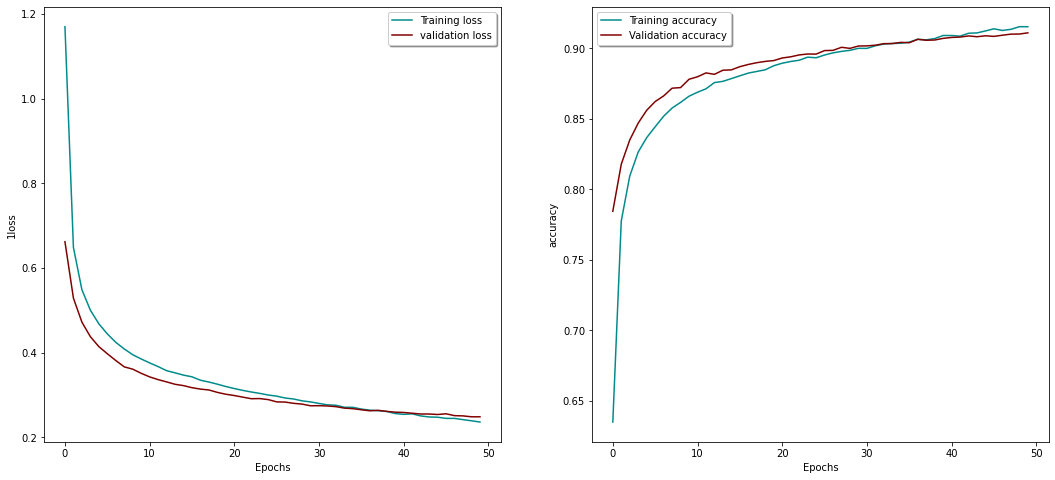

In [22]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('1loss')
plt.legend(loc='best', shadow=True)
plt.subplot(122)
plt.plot(history.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.show()

# 两层卷积层，一个2x2池层，两个全连接层，分别有68和128个神经元

In [23]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Flatten
cnn_model = tf.keras.models.Sequential()
cnn_model_2 = tf.keras.models.Sequential()

cnn_model_2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn_model_2.add(Dropout(0.2))
cnn_model_2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model_2.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model_2.add(Dropout(0.3))
cnn_model_2.add(Flatten())

cnn_model_2.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
cnn_model_2.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

cnn_model_2.add(Dense(10, activation='softmax'))

In [24]:
cnn_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

In [25]:
cnn_model_2.compile(optimizer= Adam(lr= 0.0001),
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience = 3)

In [27]:
history_2 = cnn_model_2.fit(X_train, y_train,
          batch_size= 300,
          epochs=50,
          verbose=1,
          validation_data=(X_validate, y_validate))

Epoch 1/50
160/160 [==============================] - 2s 5ms/step - loss: 1.0648 - accuracy: 0.6403 - val_loss: 0.6539 - val_accuracy: 0.7648
Epoch 2/50
160/160 [==============================] - 1s 4ms/step - loss: 0.5918 - accuracy: 0.7853 - val_loss: 0.5430 - val_accuracy: 0.8018
Epoch 3/50
160/160 [==============================] - 1s 4ms/step - loss: 0.5217 - accuracy: 0.8109 - val_loss: 0.4941 - val_accuracy: 0.8275
Epoch 4/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4833 - accuracy: 0.8265 - val_loss: 0.4542 - val_accuracy: 0.8422
Epoch 5/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4537 - accuracy: 0.8392 - val_loss: 0.4302 - val_accuracy: 0.8518
Epoch 6/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4311 - accuracy: 0.8470 - val_loss: 0.4113 - val_accuracy: 0.8587
Epoch 7/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4178 - accuracy: 0.8511 - val_loss: 0.3988 - val_accuracy: 0.8622
Epoch 

In [14]:
from tensorflow.keras.models import load_model
cnn_model_2=load_model('saved_model/cnn_Model2.h5')

In [15]:
score = cnn_model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.21380963921546936
Test accuracy: 92.14000105857849


#### 储存模型

In [30]:
from tensorflow.keras.models import load_model
cnn_model_2.save('saved_model/cnn_Model2.h5')

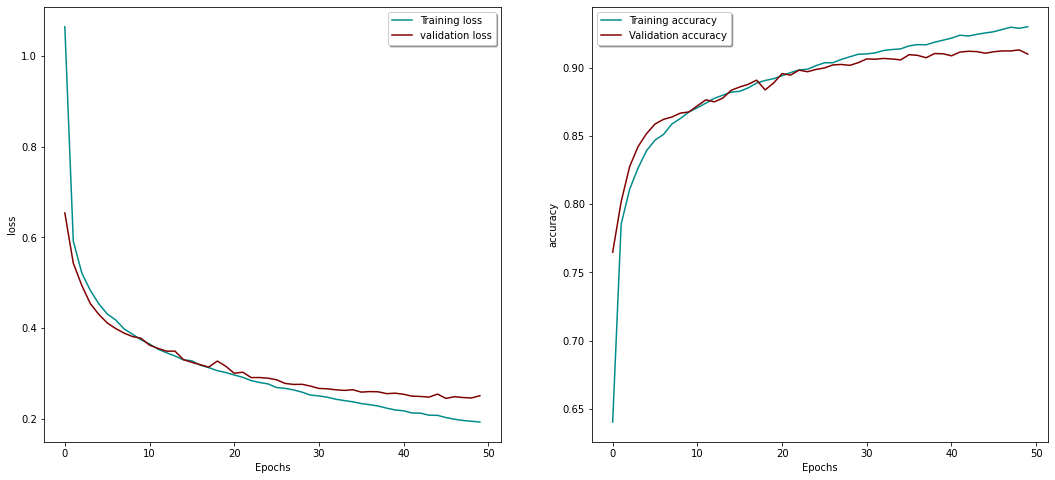

In [31]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_2.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_2.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.subplot(122)
plt.plot(history_2.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history_2.history['val_accuracy'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.show()

# 三层卷积层 两个2x2池层，两个全连接层，分别有128和256个神经元

In [32]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Flatten
cnn_model_3 = tf.keras.models.Sequential()

cnn_model_3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn_model_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model_3.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn_model_3.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model_3.add(Dropout(0.3))
cnn_model_3.add(Flatten())

cnn_model_3.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

cnn_model_3.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

cnn_model_3.add(Dense(10, activation='softmax'))

In [33]:
cnn_model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)             

In [34]:
cnn_model_3.compile(optimizer= Adam(lr= 0.0001),
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [35]:
history_3 = cnn_model_3.fit(X_train, y_train,
                            batch_size=300,
                            epochs=50,
                            verbose=1,
                            validation_data=(X_validate, y_validate))

Epoch 1/50
160/160 [==============================] - 1s 6ms/step - loss: 1.1742 - accuracy: 0.6054 - val_loss: 0.6458 - val_accuracy: 0.7567
Epoch 2/50
160/160 [==============================] - 1s 5ms/step - loss: 0.6094 - accuracy: 0.7692 - val_loss: 0.5324 - val_accuracy: 0.7933
Epoch 3/50
160/160 [==============================] - 1s 5ms/step - loss: 0.5259 - accuracy: 0.8026 - val_loss: 0.4799 - val_accuracy: 0.8261
Epoch 4/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4823 - accuracy: 0.8236 - val_loss: 0.4389 - val_accuracy: 0.8462
Epoch 5/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4440 - accuracy: 0.8399 - val_loss: 0.4090 - val_accuracy: 0.8558
Epoch 6/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4200 - accuracy: 0.8493 - val_loss: 0.3855 - val_accuracy: 0.8600
Epoch 7/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4006 - accuracy: 0.8566 - val_loss: 0.3677 - val_accuracy: 0.8708
Epoch 

In [16]:
from tensorflow.keras.models import load_model
cnn_model_3=load_model('saved_model/cnn_Model3.h5')

In [17]:
score = cnn_model_3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.17780041694641113
Test accuracy: 93.73000264167786


In [37]:
from tensorflow.keras.models import load_model
cnn_model_3.save('saved_model/cnn_Model3.h5')

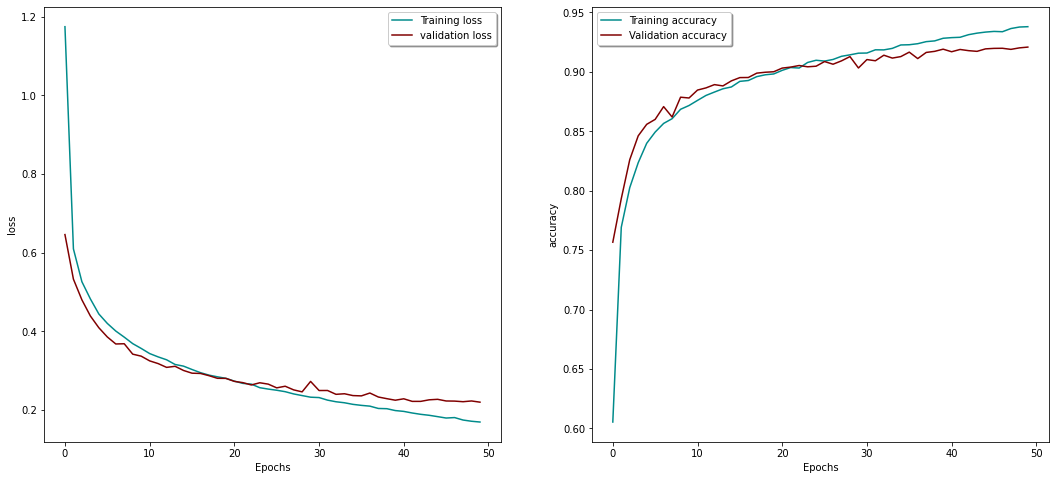

In [38]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_3.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_3.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.subplot(122)
plt.plot(history_3.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history_3.history['val_accuracy'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.show()

# 四个卷积层，两个池层，三个全连接层，分别有128,256,512个神经元

In [39]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Flatten
cnn_model_4 =tf.keras.models.Sequential()

cnn_model_4.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=input_shape))
cnn_model_4.add(Dropout(0.4))
cnn_model_4.add(Conv2D(64, 3, padding='same', activation='relu'))
cnn_model_4.add(MaxPooling2D(2))

cnn_model_4.add(Conv2D(128, 3, padding='same', activation ='relu'))
cnn_model_4.add(Dropout(0.4))
cnn_model_4.add(Conv2D(256, 3, padding='same', activation ='relu'))
cnn_model_4.add(MaxPooling2D(2, 2))
cnn_model_4.add(Dropout(0.4))

cnn_model_4.add(Flatten())
cnn_model_4.add(Dense(128, activation='relu'))
cnn_model_4.add(Dropout(0.5))

cnn_model_4.add(Dense(256, activation='relu'))
cnn_model_4.add(Dropout(0.5))

cnn_model_4.add(Dense(512, activation='relu'))
cnn_model_4.add(Dropout(0.5))

cnn_model_4.add(Dense(10, activation='softmax'))

In [40]:
cnn_model_4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_9 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 256)      

In [41]:
cnn_model_4.compile(optimizer=Adam(lr = 0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
history_4 = cnn_model_4.fit(X_train, y_train,
                            validation_data=(X_validate, y_validate),
                            epochs=90,
                            batch_size=300)

Epoch 1/90
160/160 [==============================] - 2s 9ms/step - loss: 1.7157 - accuracy: 0.3500 - val_loss: 1.1151 - val_accuracy: 0.5738
Epoch 2/90
160/160 [==============================] - 1s 8ms/step - loss: 1.0621 - accuracy: 0.5968 - val_loss: 0.7179 - val_accuracy: 0.7570
Epoch 3/90
160/160 [==============================] - 1s 8ms/step - loss: 0.8035 - accuracy: 0.7047 - val_loss: 0.6089 - val_accuracy: 0.7788
Epoch 4/90
160/160 [==============================] - 1s 8ms/step - loss: 0.7062 - accuracy: 0.7440 - val_loss: 0.5442 - val_accuracy: 0.7939
Epoch 5/90
160/160 [==============================] - 1s 8ms/step - loss: 0.6477 - accuracy: 0.7673 - val_loss: 0.5091 - val_accuracy: 0.8104
Epoch 6/90
160/160 [==============================] - 1s 8ms/step - loss: 0.6061 - accuracy: 0.7795 - val_loss: 0.4803 - val_accuracy: 0.8227
Epoch 7/90
160/160 [==============================] - 1s 8ms/step - loss: 0.5784 - accuracy: 0.7925 - val_loss: 0.4503 - val_accuracy: 0.8409
Epoch 

In [18]:
from tensorflow.keras.models import load_model
cnn_model_4=load_model('saved_model/cnn_Model4.h5')

In [19]:
score = cnn_model_4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.13688963651657104
Test accuracy: 95.35999894142151


In [44]:
from tensorflow.keras.models import load_model
cnn_model_4.save('saved_model/cnn_Model4.h5')

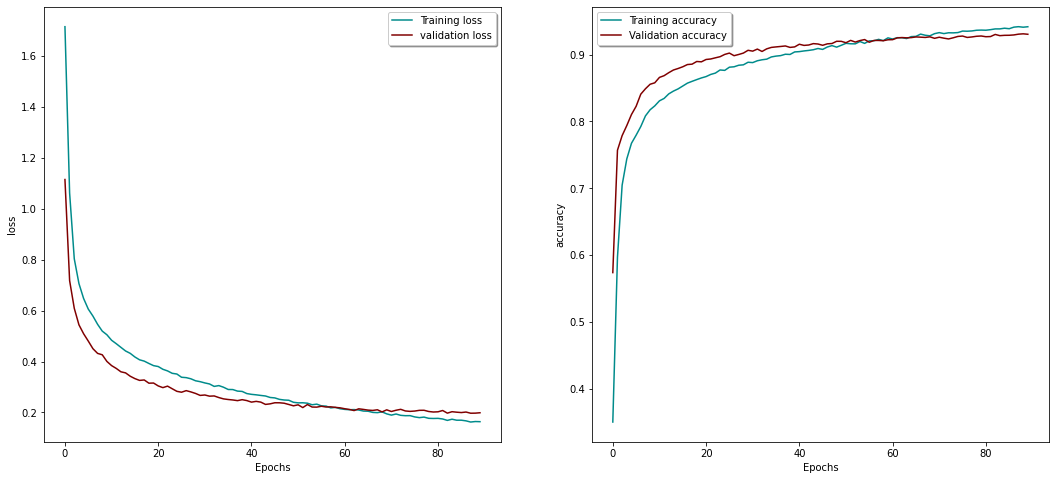

In [45]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_4.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_4.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.subplot(122)
plt.plot(history_4.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history_4.history['val_accuracy'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.show()

#### 五个卷积层，三个池层，三个全连接层，分别有256,512,1024个神经元
#### 带填充

In [46]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Flatten
cnn_model_5 =tf.keras.models.Sequential()

cnn_model_5.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=input_shape))
cnn_model_5.add(Dropout(0.5))
cnn_model_5.add(Conv2D(64, 3, padding='same', activation='relu'))
cnn_model_5.add(MaxPooling2D(2))

cnn_model_5.add(Conv2D(128, 3, padding='same', activation ='relu'))
cnn_model_5.add(Dropout(0.5))
cnn_model_5.add(Conv2D(256, 3, padding='same', activation ='relu'))
cnn_model_5.add(MaxPooling2D(2, 2))

cnn_model_5.add(Conv2D(512, 3, padding='same', activation ='relu'))
cnn_model_5.add(Dropout(0.5))
cnn_model_5.add(MaxPooling2D(2, 2))

cnn_model_5.add(Dropout(0.3))

cnn_model_5.add(Flatten())

cnn_model_5.add(Dense(256, activation='relu'))
cnn_model_5.add(Dropout(0.5))
cnn_model_5.add(Dense(512, activation='relu'))
cnn_model_5.add(Dropout(0.5))
cnn_model_5.add(Dense(1024, activation='relu'))
cnn_model_5.add(Dropout(0.5))
cnn_model_5.add(Dense(10, activation='softmax'))

In [47]:
cnn_model_5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_15 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 256)      

In [48]:
cnn_model_5.compile(optimizer=Adam(lr = 0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
history_5 = cnn_model_5.fit(X_train, y_train,
                    validation_data=(X_validate, y_validate),
                    epochs=90, 
                    batch_size=300)

Epoch 1/90
160/160 [==============================] - 3s 12ms/step - loss: 1.6773 - accuracy: 0.3375 - val_loss: 1.4576 - val_accuracy: 0.5882
Epoch 2/90
160/160 [==============================] - 2s 11ms/step - loss: 0.9763 - accuracy: 0.6224 - val_loss: 0.9851 - val_accuracy: 0.7214
Epoch 3/90
160/160 [==============================] - 2s 11ms/step - loss: 0.7504 - accuracy: 0.7151 - val_loss: 0.8527 - val_accuracy: 0.7575
Epoch 4/90
160/160 [==============================] - 2s 11ms/step - loss: 0.6673 - accuracy: 0.7456 - val_loss: 0.7448 - val_accuracy: 0.7846
Epoch 5/90
160/160 [==============================] - 2s 11ms/step - loss: 0.6123 - accuracy: 0.7673 - val_loss: 0.6656 - val_accuracy: 0.7989
Epoch 6/90
160/160 [==============================] - 2s 11ms/step - loss: 0.5676 - accuracy: 0.7862 - val_loss: 0.5711 - val_accuracy: 0.8211
Epoch 7/90
160/160 [==============================] - 2s 11ms/step - loss: 0.5333 - accuracy: 0.8006 - val_loss: 0.5632 - val_accuracy: 0.8332

In [20]:
from tensorflow.keras.models import load_model
cnn_model_5=load_model('saved_model/cnn_Model5.h5')

In [21]:
score = cnn_model_5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.12944188714027405
Test accuracy: 95.50999999046326


In [51]:
cnn_model_5.save('saved_model/cnn_Model5.h5')

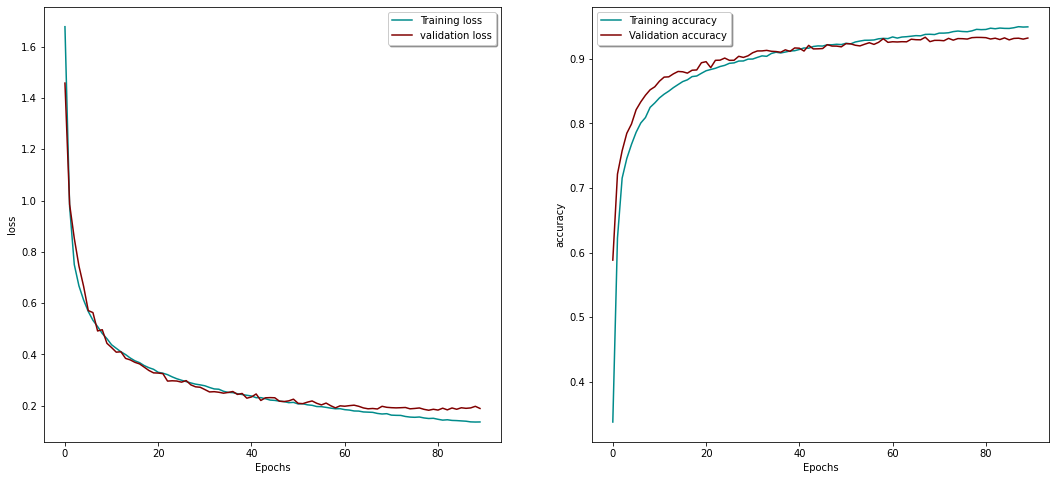

In [52]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_5.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_5.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.subplot(122)
plt.plot(history_5.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history_5.history['val_accuracy'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.show()

#### 五个卷积层，三个池层，三个全连接层，分别有256,512,1024个神经元
#### 带填充，以及进行批量标准化


In [53]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Flatten
cnn_all = tf.keras.models.Sequential()

cnn_all.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=input_shape))
cnn_all.add(Dropout(0.5))
BatchNormalization()

cnn_all.add(Conv2D(64, 3, padding='same', activation='relu'))
cnn_all.add(MaxPooling2D(2))
BatchNormalization()

cnn_all.add(Conv2D(128, 3, padding='same', activation ='relu'))
cnn_all.add(Dropout(0.5))
BatchNormalization()
cnn_all.add(Conv2D(256, 3, padding='same', activation ='relu'))
cnn_all.add(MaxPooling2D(2, 2))
BatchNormalization()

cnn_all.add(Conv2D(512, 3, padding='same', activation ='relu'))
cnn_all.add(Dropout(0.5))
cnn_all.add(MaxPooling2D(2, 2))
BatchNormalization()

cnn_all.add(Dropout(0.5))

cnn_all.add(Flatten())

cnn_all.add(Dense(256, activation='relu'))
cnn_all.add(Dropout(0.5))
BatchNormalization()
cnn_all.add(Dense(512, activation='relu'))
cnn_all.add(Dropout(0.5))
BatchNormalization()
cnn_all.add(Dense(1024, activation='relu'))
cnn_all.add(Dropout(0.5))
BatchNormalization()
cnn_all.add(Dense(10, activation='softmax'))

In [54]:
cnn_all.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_22 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
dropout_23 (Dropout)         (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 256)      

In [55]:
cnn_all.compile(optimizer=Adam(lr = 0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
history_all = cnn_all.fit(X_train, y_train,
                    validation_data=(X_validate, y_validate),
                    epochs=140, 
                    batch_size=300)

Epoch 1/140
160/160 [==============================] - 3s 13ms/step - loss: 1.7570 - accuracy: 0.3089 - val_loss: 1.5519 - val_accuracy: 0.5578
Epoch 2/140
160/160 [==============================] - 2s 11ms/step - loss: 1.0576 - accuracy: 0.5860 - val_loss: 1.0666 - val_accuracy: 0.6924
Epoch 3/140
160/160 [==============================] - 2s 11ms/step - loss: 0.7990 - accuracy: 0.6959 - val_loss: 0.9661 - val_accuracy: 0.7184
Epoch 4/140
160/160 [==============================] - 2s 11ms/step - loss: 0.7067 - accuracy: 0.7307 - val_loss: 0.8274 - val_accuracy: 0.7540
Epoch 5/140
160/160 [==============================] - 2s 11ms/step - loss: 0.6484 - accuracy: 0.7519 - val_loss: 0.7376 - val_accuracy: 0.7816
Epoch 6/140
160/160 [==============================] - 2s 11ms/step - loss: 0.6051 - accuracy: 0.7681 - val_loss: 0.6635 - val_accuracy: 0.8062
Epoch 7/140
160/160 [==============================] - 2s 11ms/step - loss: 0.5688 - accuracy: 0.7834 - val_loss: 0.6019 - val_accuracy:

In [22]:
from tensorflow.keras.models import  load_model
cnn_all=load_model('saved_model/cnn_all.h5')

In [23]:
#y_pred = cnn_all.predict_classes(X_test, verbose=0)
score = cnn_all.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.10858841240406036
Test accuracy: 96.53000235557556


In [58]:
cnn_all.save('saved_model/cnn_all.h5')

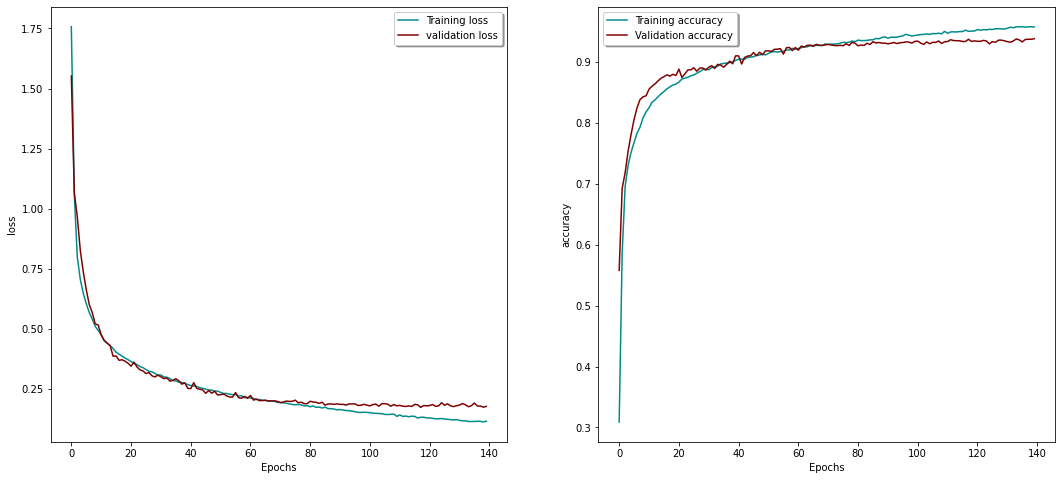

In [59]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_all.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_all.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.subplot(122)
plt.plot(history_all.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history_all.history['val_accuracy'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.show()

#### 混淆矩阵

In [25]:
from tensorflow.keras.models import load_model
cnn_all=load_model('saved_model/cnn_all.h5')
y_pred = cnn_all.predict_classes(X_test, verbose=0)
score = cnn_all.evaluate(X_test, y_test, verbose=0)

D:\data\PythonProgram\MachineStudyFinalWork\venv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [27]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
classes = {0: 'T-shirt',
           1: 'trousers',
           2: 'sweater',
           3: 'dress',
           4: 'coat',
           5: 'sandel',
           6: 'shirt',
           7: 'sneaker',
           8: 'handbag',
           9: 'Martin boots'}

class_names = ['T-shirt','trousers','sweater','dress','coat',
                       'sandel','shirt','sneaker','handbag','Martin boots']

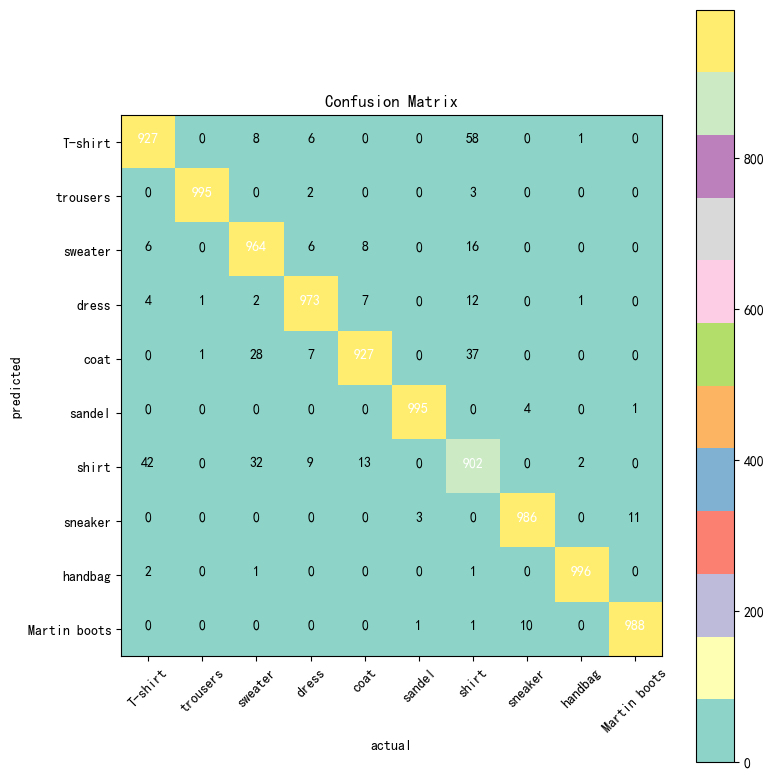

In [28]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
def plot_confusion_matrix(cm, classes,
                          title='Confusion Matrix',
                          cmap=plt.cm.Set3):
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('predicted')
    plt.xlabel('actual')
    plt.show()

cnf_matrix = confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes = class_names)

# 处理DataFountain平台数据

#### 在上述训练后，当我从网上下载的另一份fashion-minist的数据集作为测试集时，准确率最终有96.5%左右，接下来的就是处理DataFountain平台的数据，输出得到结果上传平台

#### 引入依赖，处理数据

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

train_data = pd.read_csv('train__data.csv')
test_data = pd.read_csv('test__data.csv')
train_data.head()

train_data = np.array(train_data, dtype='float32')
test_data = np.array(test_data, dtype='float32')

X_train_orig = train_data[:, 1:] / 255
y_train_orig = train_data[:, 0]
X_test = test_data[:, 1:] / 255
Y_test = test_data[:, 0]

X_train, X_validate, y_train, y_validate = train_test_split(X_train_orig, y_train_orig, test_size=0.2, random_state=42)

image_rows = 28
image_cols = 28
input_shape = (image_rows, image_cols, 1)
X_train = X_train.reshape(X_train.shape[0], image_rows, image_cols, 1)
X_test = X_test.reshape(X_test.shape[0], image_rows, image_cols, 1)
X_validate = X_validate.reshape(X_validate.shape[0], image_rows, image_cols, 1)

#### 获取测试结果

In [31]:
from tensorflow.keras.models import load_model
cnn_all = load_model('saved_model/cnn_all.h5')
y_pred = cnn_all.predict_classes(X_test, verbose=0)

y_pred

D:\data\PythonProgram\MachineStudyFinalWork\venv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

#### 将结果作为csv保存

In [34]:
a = {}
for i in range(10000):
    a[i] = "{}.jpg".format(i)
# print(a)

data = [([0] * 2) for p in range(10000)]
for i in range(10000):
    for j in range(2):
        if j == 0:
            data[i][j] = "{}.jpg".format(i)
        if j == 1:
            data[i][j] = y_pred[i]

import pandas as pd

df = pd.DataFrame(data=data)
df.to_csv('result.csv')
df

,0,1
0,0.jpg,0
1,1.jpg,1
2,2.jpg,2
3,3.jpg,2
4,4.jpg,3
...,...,...
9995,9995.jpg,0
9996,9996.jpg,6
9997,9997.jpg,8
9998,9998.jpg,8
